# **Binome** :

*   **Wacim BELAHCEL**
*   **Imad Oualid KACIMI**




# **Installation de coclust et import des librairies**

In [1]:
pip install "coclust[alldeps]"


  Created wheel for coclust: filename=coclust-0.2.1-cp36-none-any.whl size=29872 sha256=f6aeb0105eae7d7bb0cf606e90072b7aebf7133d2a050ecbd9f0edef192e7eba
  Stored in directory: /root/.cache/pip/wheels/cd/d7/68/df601d0b5f8b934cf890dc626c2271df381fb0c3e910b0a34e
Successfully built coclust


In [4]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.feature_extraction.text import TfidfTransformer

from scipy.io import loadmat
from coclust.coclustering import CoclustMod
import matplotlib.pyplot as plt
import seaborn as sns
from coclust.io.data_loading import load_doc_term_data
from coclust.visualization import (plot_reorganized_matrix,
                                  plot_cluster_top_terms,
                                  plot_max_modularities)
from coclust.evaluation.internal import best_modularity_partition
import coclust
import scipy
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.metrics import accuracy_score as acc
import matplotlib
%matplotlib inline

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Function used**

In [ ]:
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels,predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix ')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

## **Extracation de la matrice de co-occurence**

## **Lecture du fichier**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/textmining/spam.csv", encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.replace(['ham','spam'],[0, 1])
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## **Preprocessing des données**

In [5]:
ps = PorterStemmer()

def preprocessing(row):
  msg=row
  msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', msg)
  msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', msg)
  msg = re.sub('£|\$', 'moneysymb', msg)
  msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', msg)
  msg = re.sub('\d+(\.\d+)?', 'numbr', msg)
  msg = re.sub('[^\w\d\s]', ' ', msg)
  msg = msg.lower()  
  msg = msg.split() 
  #
  msg = [ps.stem(word) for word in msg]
  msg = [word for word in msg if word not in  stopwords.words('english')]
  msg = ' '.join(msg)

  return msg

In [6]:
df["v2_prep"] = df["v2"].apply(preprocessing)

## **Export des données pour la partie en R (50 features):**

In [9]:
abstract_vectorizer = CountVectorizer(max_features=50, lowercase=True, ngram_range=(1,1), analyzer="word")
abstract_term_count = abstract_vectorizer.fit_transform(df["v2_prep"].tolist())
abstract_term_count = abstract_term_count.todense()
df_50 = pd.DataFrame(abstract_term_count)
df_50.rename(columns={i:x for i,x in enumerate(abstract_vectorizer.get_feature_names())}, inplace=True)
df_50

,back,call,come,da,day,dont,free,get,go,good,got,gt,hi,home,httpaddr,know,like,lor,love,lt,make,mobil,need,numbr,numbrp,ok,one,onli,phone,pleas,repli,say,see,send,sorri,still,stop,take,tell,text,thi,think,time,today,txt,ur,wa,want,week,åmoneysymbnumbr
0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
5568,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5570,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
df_50["spam_class"] = df["v1"]

In [11]:
df_50.to_csv("spam_cocurence_50.csv",index=False)

## **Q4 Partie coclustering**

In [12]:
abstract_vectorizer = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1), analyzer="word")
abstract_term_count = abstract_vectorizer.fit_transform(df["v2_prep"].tolist())
abstract_term_count = abstract_term_count.todense()
df2 = pd.DataFrame(abstract_term_count)
df2.rename(columns={i:x for i,x in enumerate(abstract_vectorizer.get_feature_names())}, inplace=True)
df2

,abiola,abl,abt,accept,access,account,across,activ,actual,ad,add,address,admir,aft,afternoon,age,agenumbr,ago,ah,aight,al,almost,alon,alreadi,alright,also,alway,amp,angri,ani,anoth,answer,anyon,anyth,anytim,anyway,apart,app,appli,appreci,...,within,without,wk,wkli,wnumbrjnumbrhl,woke,wonder,wont,word,work,world,worri,worth,wot,would,wow,write,wrong,www,xma,xx,xxx,xy,ya,yahoo,yar,ye,yeah,year,yep,yesterday,yet,yo,yr,yup,åmoneysymbnumbr,ì_,ìï,û_,ûò
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df2["spam_class"] = df["v1"]

In [101]:
df2.to_csv("spam_cocurence_1000.csv",index=False)

### **Application des differents algorithmes**

In [15]:
X = df2.drop("spam_class",axis=1).to_numpy()
labels = df2.drop("spam_class",axis=1).columns.to_numpy()

# get the best co-clustering over a range of cluster numbers
clusters_range = range(2, 3)
model, modularities = best_modularity_partition(X, clusters_range, n_rand_init=1)

model_CoclustMod = coclust.coclustering.CoclustMod(n_clusters=2, init=None, max_iter=200, n_init=1, tol=1e-09, random_state=1)
model_CoclustInfo_2 = coclust.coclustering.CoclustInfo(n_row_clusters=2, n_col_clusters=2, init=None, max_iter=200, n_init=1, tol=1e-09, random_state=1)
model_CoclustInfo_3 = coclust.coclustering.CoclustInfo(n_row_clusters=2, n_col_clusters=2, init=None, max_iter=200, n_init=1, tol=1e-09, random_state=1)
model_CoclustSpecMod = coclust.coclustering.CoclustSpecMod(n_clusters=2, max_iter=200, tol=1e-09, n_init=1, random_state=1)

model_CoclustMod.fit(X)
model_CoclustInfo_2.fit(X)
model_CoclustInfo_3.fit(X)
model_CoclustSpecMod.fit(X)

Computing coclust modularity for a range of cluster numbers =
 2 ...


/usr/local/lib/python3.6/dist-packages/coclust/coclustering/coclust_mod.py:97: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=False, estimator=None)


 All done !


/usr/local/lib/python3.6/dist-packages/coclust/coclustering/coclust_mod.py:97: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=False, estimator=None)
/usr/local/lib/python3.6/dist-packages/coclust/coclustering/coclust_info.py:97: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=False, estimator=None)
/usr/local/lib/python3.6/dist-packages/coclust/coclustering/coclust_info.py:97: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=False, estimator=None)
/usr/local/lib/python3.6/dist-packages/coclust/coclustering/coclust_spec_mod.py:87: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.


### **comparaison des resultats:**

Si on compare SKmeans avec les algorithmes coclustmod (modularité), coclustinfo (information mutuelle), la methode skmeans obtiens des résultat equivalent au niveau de la nmi, et supperieurs au niveaux de ARI. cependant les algorithme de coclust semble avoir une meilleure accuracy (meme si les classes sont imbalanced).

Pour l'algorithme von-Mises	Fische, on remarque qu'il obtient des rèsultats supperieurs au malgorithme coclustinfo et coclustmod sur l'ARI et la NMI et equivalent pour l'accuracy.


D'autre part, si on compare les differente methode de coclusetering entre elle, l'algorithm CoclustSpecMod, semble avoir completement surpasser les autres algorithmes sur tous les niveaux avec 96% d'accuracy, 80 % d'ARI et 63% de NMI. On remarque d'ailleur en utilisant les outils de visualisation que mise a part quelque outliers les résultats des prédictions obtenues avec CoclustSpecMod semble etre simmilaire aux labels originaux.

En effet, on peut dire que les algorithmes skmeans, von-Mises	Fische et de coclustering sont des algorithmes très adaptés aux problèmatiques liées au texte.



#### **NMI**

In [20]:

true_row_labels = df2["spam_class"].values

print("NMI model_CoclustMod: ",nmi(true_row_labels, model_CoclustMod.row_labels_))
print("NMI model_CoclustInfo_2: ",nmi(true_row_labels, model_CoclustInfo_2.row_labels_))
print("NMI model_CoclustInfo_3: ",nmi(true_row_labels, model_CoclustInfo_3.row_labels_))
print("NMI model_CoclustSpecMod: ",nmi(true_row_labels, model_CoclustSpecMod.row_labels_))


NMI model_CoclustMod:  0.22516443181494494
NMI model_CoclustInfo_2:  0.3204569303937992
NMI model_CoclustInfo_3:  0.3204569303937992
NMI model_CoclustSpecMod:  0.6396659218548788


#### **ARI**

In [22]:

print("ARI model_CoclustMod: ",ari(true_row_labels, model_CoclustMod.row_labels_))
print("ARI model_CoclustInfo_2: ",ari(true_row_labels, model_CoclustInfo_2.row_labels_))
print("ARI model_CoclustInfo_2: ",ari(true_row_labels, model_CoclustInfo_3.row_labels_))
print("ARI model_CoclustSpecMod: ",ari(true_row_labels, model_CoclustSpecMod.row_labels_))

ARI model_CoclustMod:  0.1946479390310005
ARI model_CoclustInfo_2:  0.37466448503655897
ARI model_CoclustInfo_2:  0.37466448503655897
ARI model_CoclustSpecMod:  0.8002860110842361


#### **Accuracy**


In [100]:
print("accuracy model_CoclustMod: ",acc(true_row_labels, model_CoclustMod.row_labels_))
print("accuracy model_CoclustInfo_2: ",acc(true_row_labels, model_CoclustInfo_2.row_labels_))
print("accuracy model_CoclustInfo_2: ",acc(true_row_labels, model_CoclustInfo_3.row_labels_))
print("accuracy model_CoclustSpecMod: ",acc(true_row_labels, model_CoclustSpecMod.row_labels_))

accuracy model_CoclustMod:  0.7311557788944724
accuracy model_CoclustInfo_2:  0.8282483847810481
accuracy model_CoclustInfo_2:  0.8282483847810481
accuracy model_CoclustSpecMod:  0.9623115577889447


#### **classification report : matrice de confusion + accuracy**

              precision    recall  f1-score   support

           0       0.99      0.69      0.82      4825
           1       0.33      0.97      0.49       747

    accuracy                           0.73      5572
   macro avg       0.66      0.83      0.65      5572
weighted avg       0.90      0.73      0.77      5572



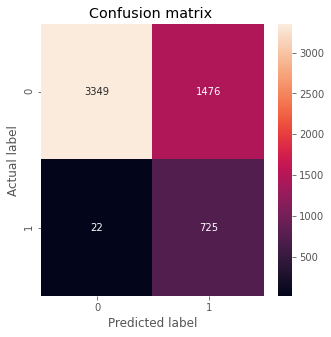

In [ ]:
print(classification_report( df2["spam_class"].values,model_CoclustMod.row_labels_,))
plot_cm(df2["spam_class"].values, model_CoclustMod.row_labels_)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      4825
           1       0.44      0.96      0.60       747

    accuracy                           0.83      5572
   macro avg       0.71      0.88      0.75      5572
weighted avg       0.92      0.83      0.85      5572



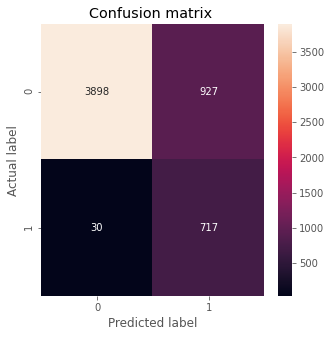

In [ ]:
print(classification_report( df2["spam_class"].values,model_CoclustInfo_2.row_labels_,))
plot_cm(df2["spam_class"].values, model_CoclustInfo_2.row_labels_)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      4825
           1       0.44      0.96      0.60       747

    accuracy                           0.83      5572
   macro avg       0.71      0.88      0.75      5572
weighted avg       0.92      0.83      0.85      5572



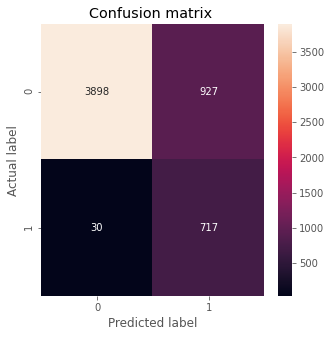

In [ ]:
print(classification_report( df2["spam_class"].values,model_CoclustInfo_3.row_labels_,))
plot_cm(df2["spam_class"].values, model_CoclustInfo_3.row_labels_)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4825
           1       0.84      0.89      0.86       747

    accuracy                           0.96      5572
   macro avg       0.91      0.93      0.92      5572
weighted avg       0.96      0.96      0.96      5572



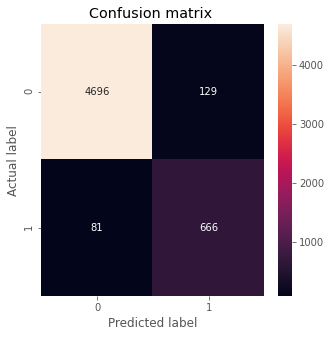

In [ ]:
print(classification_report( df2["spam_class"].values,model_CoclustSpecMod.row_labels_,))
plot_cm(df2["spam_class"].values, model_CoclustSpecMod.row_labels_)

#### **Visualisation de la matrice réorganisée pour la meilleure méthode**

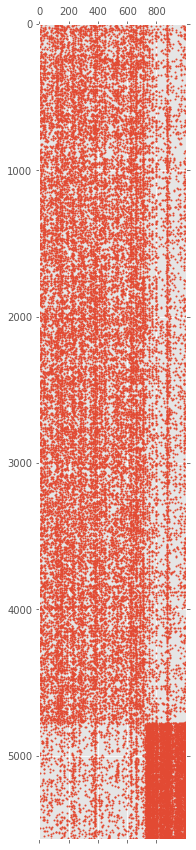

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)
coclust.visualization.plot_reorganized_matrix(X, model_CoclustSpecMod, )

# **Q5**

## **Tsne**

In [ ]:
tsne = TSNE(n_components=2,learning_rate=50,perplexity = 30,n_iter=2500,init = 'pca',  random_state=2019)
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


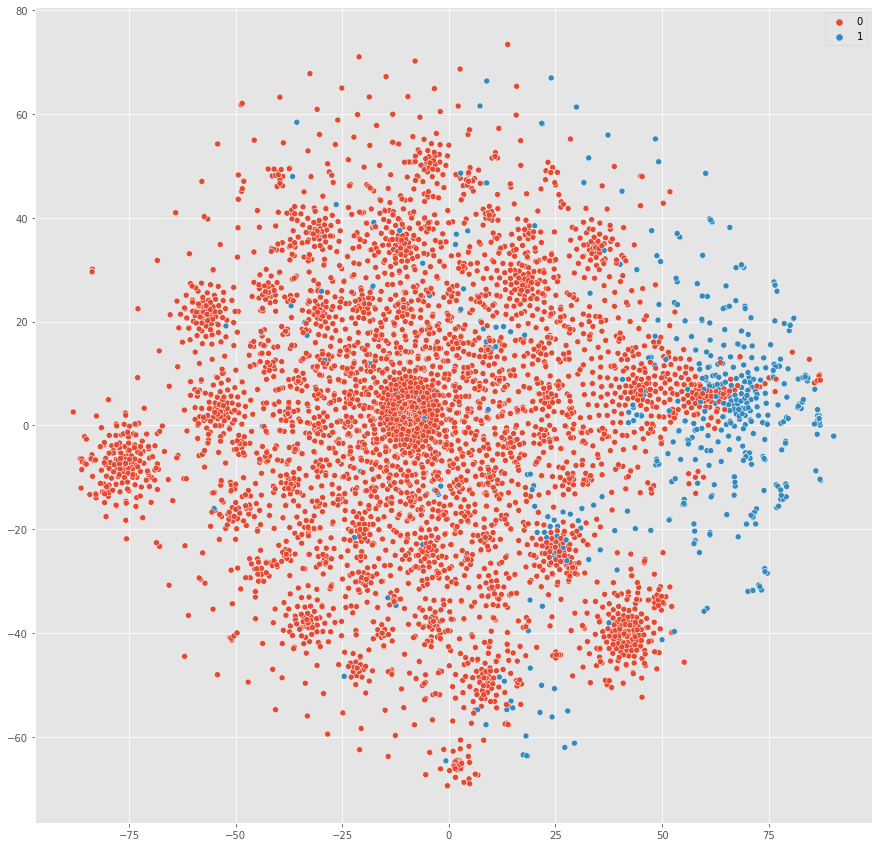

In [ ]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


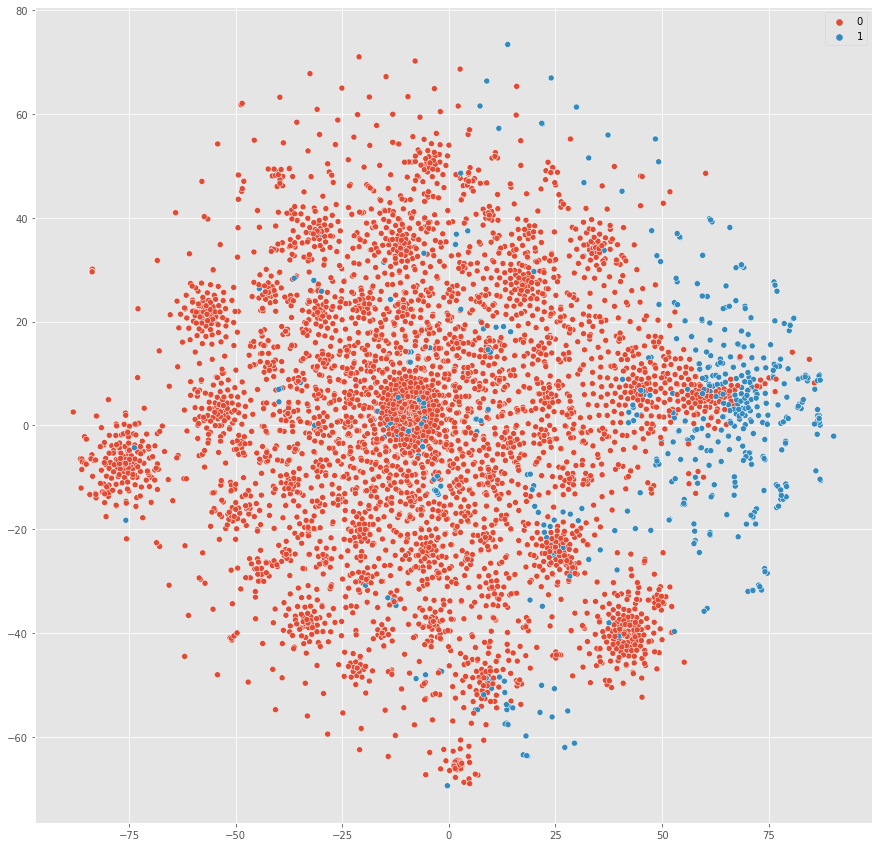

In [ ]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')

## **isomap**

In [ ]:

isomap = Isomap(n_components=2, n_jobs = 4, n_neighbors = 5)
isomap.fit(X)


Isomap(eigen_solver='auto', max_iter=None, metric='minkowski',
       metric_params=None, n_components=2, n_jobs=4, n_neighbors=5,
       neighbors_algorithm='auto', p=2, path_method='auto', tol=0)

In [ ]:
X_isomap = isomap.transform(X)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


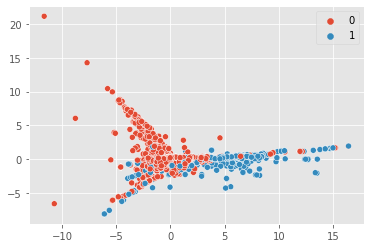

In [ ]:
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


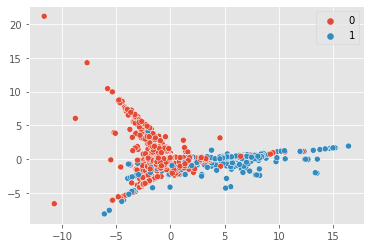

In [ ]:
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')

## **autoencoder**

In [ ]:
m = Sequential()
m.add(Dense(512,  activation='elu', input_shape=(1000,)))
m.add(Dense(256,  activation='elu'))
m.add(Dense(128,  activation='elu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(128,  activation='elu'))
m.add(Dense(256,  activation='elu'))
m.add(Dense(512,  activation='elu'))
m.add(Dense(1000,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(X, X, batch_size=128, epochs=100, verbose=1)

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(X)
Renc = m.predict(X)


Epoch 1/100
44/44 [==============================] - 2s 29ms/step - loss: 0.1144
Epoch 2/100
44/44 [==============================] - 1s 28ms/step - loss: 0.0090
Epoch 3/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0089
Epoch 4/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0091
Epoch 5/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0092
Epoch 6/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0088
Epoch 7/100
44/44 [==============================] - 1s 28ms/step - loss: 0.0086
Epoch 8/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0087
Epoch 9/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0091
Epoch 10/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0090
Epoch 11/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0088
Epoch 12/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0088
Epoch 13/100
44/44 [=====

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


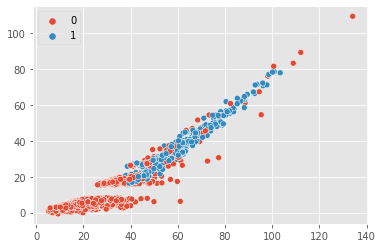

In [ ]:
sns.scatterplot(Zenc[:,0], Zenc[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


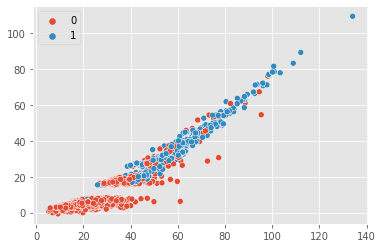

In [ ]:
sns.scatterplot(Zenc[:,0], Zenc[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')

# **Q6 TF-idf**

In [ ]:
X = df2.drop("spam_class",axis=1).to_numpy()
labels = df2.drop("spam_class",axis=1).columns.to_numpy()
tfidf =TfidfTransformer(norm=u'l2', use_idf=True, smooth_idf=False, sublinear_tf=False)
X =tfidf.fit_transform(X)

In [ ]:
X =X.toarray()

## **Tsne**

In [ ]:
tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


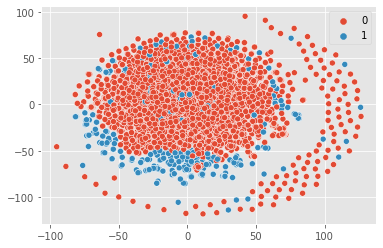

In [ ]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


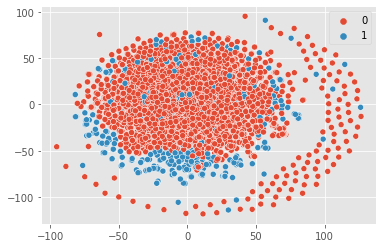

In [ ]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')

## **isomap**

In [ ]:

isomap = Isomap(n_components=2, n_jobs = 4, n_neighbors = 5)
isomap.fit(X)


Isomap(eigen_solver='auto', max_iter=None, metric='minkowski',
       metric_params=None, n_components=2, n_jobs=4, n_neighbors=5,
       neighbors_algorithm='auto', p=2, path_method='auto', tol=0)

In [ ]:
X_isomap = isomap.transform(X)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


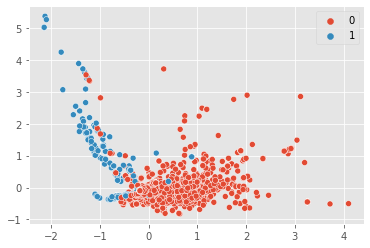

In [ ]:
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


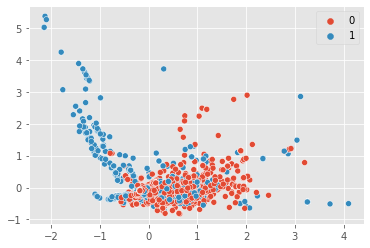

In [ ]:
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=model_CoclustInfo_3.row_labels_, legend='full')

## **autencoder**

In [ ]:
m = Sequential()
m.add(Dense(512,  activation='elu', input_shape=(1000,)))
m.add(Dense(256,  activation='elu'))
m.add(Dense(128,  activation='elu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(128,  activation='elu'))
m.add(Dense(256,  activation='elu'))
m.add(Dense(512,  activation='elu'))
m.add(Dense(1000,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(X, X, batch_size=128, epochs=100, verbose=1)

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(X)
Renc = m.predict(X)


Epoch 1/100
44/44 [==============================] - 2s 29ms/step - loss: 0.1160
Epoch 2/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8725e-04
Epoch 3/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8656e-04
Epoch 4/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8550e-04
Epoch 5/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8330e-04
Epoch 6/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8564e-04
Epoch 7/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8633e-04
Epoch 8/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8788e-04
Epoch 9/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8546e-04
Epoch 10/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8618e-04
Epoch 11/100
44/44 [==============================] - 1s 29ms/step - loss: 9.8561e-04
Epoch 12/100
44/44 [==============================] - 1s 29ms/step 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


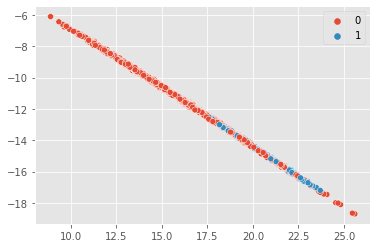

In [ ]:
sns.scatterplot(Zenc[:,0], Zenc[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


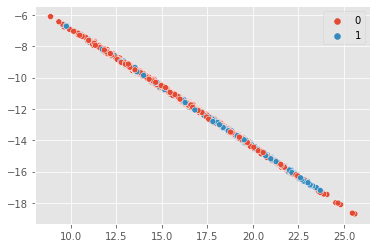

In [ ]:
sns.scatterplot(Zenc[:,0], Zenc[:,1], hue=model_CoclustInfo_2.row_labels_, legend='full')

# **visualisation a partir de 50 features**

## **Without td-idf**

### **Tsne**

In [78]:
X_50 = df_50.drop("spam_class",axis=1).values

In [79]:
tsne = TSNE(n_components=2,learning_rate=50,perplexity = 30,n_iter=2500,init = 'pca',  random_state=2019)
X_tsne = tsne.fit_transform(X_50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


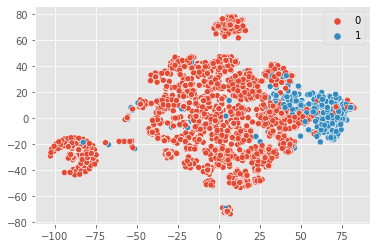

In [80]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=df_50["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


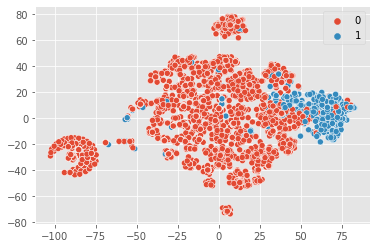

In [81]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')

### **isomap**

In [82]:

isomap = Isomap(n_components=2, n_jobs = 4, n_neighbors = 5)
isomap.fit(X_50)
X_isomap = isomap.transform(X_50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


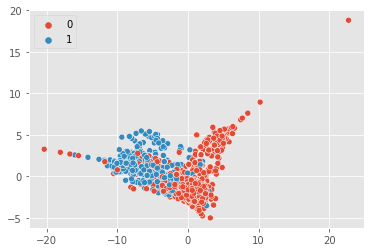

In [83]:
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


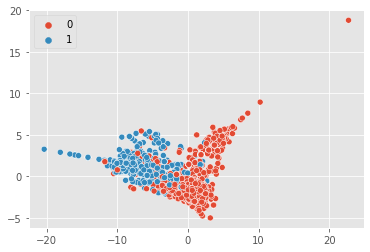

In [84]:
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')

### **autoencoder**

In [85]:
m = Sequential()
m.add(Dense(64,  activation='elu', input_shape=(50,)))
m.add(Dense(32,  activation='elu'))
m.add(Dense(16,  activation='elu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(16,  activation='elu'))
m.add(Dense(32,  activation='elu'))
m.add(Dense(64,  activation='elu'))
m.add(Dense(50,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(X_50, X_50, batch_size=128, epochs=100, verbose=1)

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(X_50)
Renc = m.predict(X_50)


Epoch 1/100
44/44 [==============================] - 1s 2ms/step - loss: 0.2445
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0707
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0661
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0648
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0666
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 9/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0607
Epoch 10/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0601
Epoch 11/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0649
Epoch 12/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0602
Epoch 13/100
44/44 [=================

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


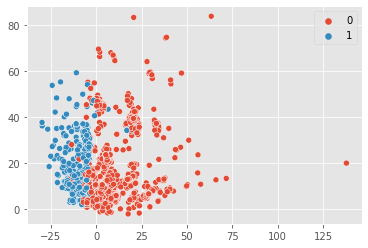

In [86]:
sns.scatterplot(Zenc[:,0], Zenc[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


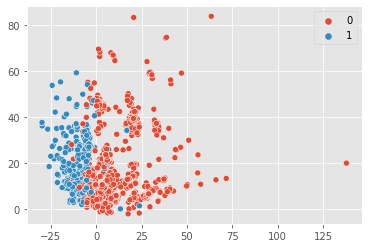

In [87]:
sns.scatterplot(Zenc[:,0], Zenc[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')

## **Q6 TF-idf**

In [88]:
X_50 = df_50.drop("spam_class",axis=1).to_numpy()
labels = df_50.drop("spam_class",axis=1).columns.to_numpy()
tfidf =TfidfTransformer(norm=u'l2', use_idf=True, smooth_idf=False, sublinear_tf=False)
X_50 =tfidf.fit_transform(X_50)

In [89]:
X_50 =X_50.toarray()

### **Tsne**

In [90]:
tsne = TSNE(n_components=2,learning_rate=50,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
X_tsne = tsne.fit_transform(X_50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


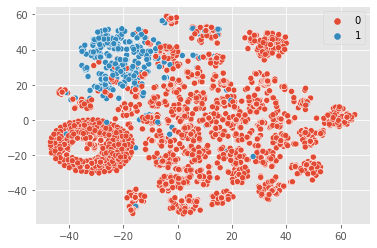

In [91]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


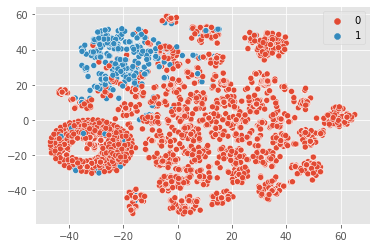

In [92]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')

### **isomap**

In [93]:

isomap = Isomap(n_components=2, n_jobs = 4, n_neighbors = 5)
isomap.fit(X_50)
X_isomap = isomap.transform(X_50)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


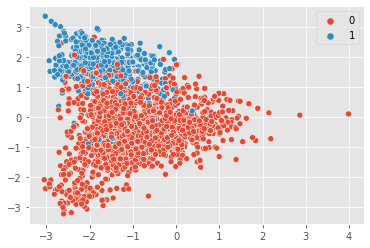

In [94]:
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


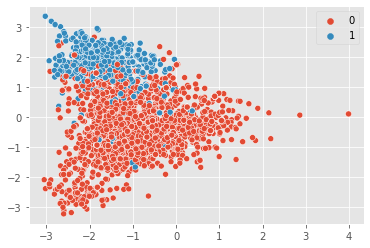

In [95]:
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')

### **autencoder**

In [96]:
m = Sequential()
m.add(Dense(64,  activation='elu', input_shape=(50,)))
m.add(Dense(32,  activation='elu'))
m.add(Dense(16,  activation='elu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(16,  activation='elu'))
m.add(Dense(32,  activation='elu'))
m.add(Dense(64,  activation='elu'))
m.add(Dense(50,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(X_50, X_50, batch_size=128, epochs=100, verbose=1)

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(X_50)
Renc = m.predict(X_50)


Epoch 1/100
44/44 [==============================] - 1s 3ms/step - loss: 0.1819
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 8/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 10/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 11/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 12/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 13/100
44/44 [=================

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


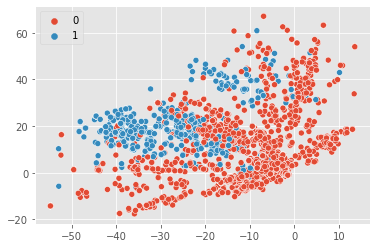

In [97]:
sns.scatterplot(Zenc[:,0], Zenc[:,1], hue=df2["spam_class"].values, legend='full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


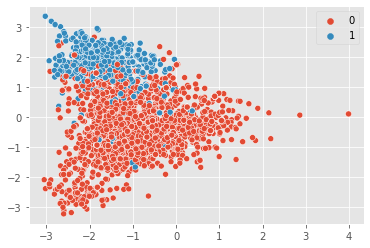

In [98]:
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=model_CoclustSpecMod.row_labels_, legend='full')